The Python code for function $x**4 - 4x**2 +3x$looks like this:

In [2]:
def p(x):
    return x**4 - 4*x**2 + 3*x

for x in [-1, 0, 2, 3.4]:
    print(x, p(x))

-1 -6
0 0
2 6
3.4 97.59359999999998


We can plot the function in a simple way with Matplotlib:

The values generated for the x-axis are the following:
[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.6666666

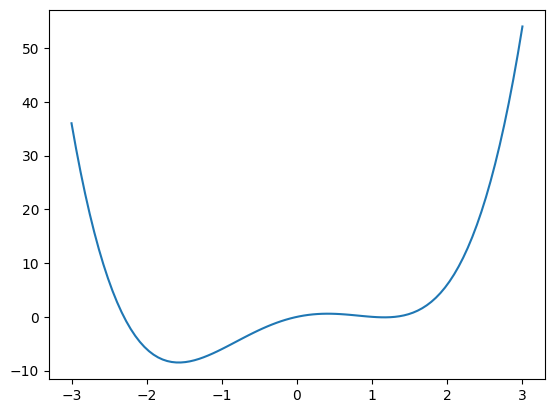

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 100, endpoint=True)
print("The values generated for the x-axis are the following:")
print(X)
F = p(X)
plt.plot(X,F)

plt.show()

A polynomial is uniquely determined by its coefficients. This means, an instance of our polynomial class needs a list or tuple to define the coefficients.

In [29]:
class Polynomial:
    
    
    def __init__(self, *coefficients):
        """ 
        input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __call__(self, x): 
        """
        It makes possible to use an instance of this class as a function
        that evaluates a polynomial
        """   
        res = 0
        for index, coeff in enumerate(self.coefficients[::-1]):
            print(f"index = {index}, coefficient = {coeff} ")
            res += coeff * x** index
        return res
    
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

    
    def __str__(self):
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

In [30]:
p = Polynomial(1, 0, -4, 3, 0)
print(p)
print(f"p(2) = {p(2)}")

x^4-4x^2+3x
index = 0, coefficient = 0 
index = 1, coefficient = 3 
index = 2, coefficient = -4 
index = 3, coefficient = 0 
index = 4, coefficient = 1 
p(2) = 6


In [31]:
p2 = eval(repr(p))
print(f"string formed with magic method str {p}")
print(f"string formed with magic method repr {repr(p)}")

string formed with magic method str x^4-4x^2+3x
string formed with magic method repr Polynomial(1, 0, -4, 3, 0)


In [32]:
eval(repr(p))

Polynomial(1, 0, -4, 3, 0)

In [33]:
repr(p)

'Polynomial(1, 0, -4, 3, 0)'

In [34]:
polys = [Polynomial(1, 0, -4, 3, 0),
         Polynomial(2, 0),
         Polynomial(4, 1, -1),
         Polynomial(3, 0, -5, 2, 7),
         Polynomial(-42)]

# output suitable for usage in LaTeX:
for count, poly in enumerate(polys):
    print(f"$p_{count} = {str(poly)}$")

$p_0 = x^4-4x^2+3x$
$p_1 = 2x$
$p_2 = 4x^2+x-1$
$p_3 = 3x^4-5x^2+2x+7$
$p_4 = -42$


In [28]:
p = Polynomial(3, 0, -5, 2, 1)
print(p)

+3x^4-5x^2+2x+1


In [11]:
for x in range(-3, 3):
    print(x, p(x))

-3 193
-2 25
-1 -3
0 1
1 1
2 33


In [35]:
coefficients = [3, 0, -5, 2, 1]
print(coefficients[::-1])

[1, 2, -5, 0, 3]


In [30]:
class Polynomial2:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
         
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

In [31]:
p1 = Polynomial(-4, 3, 0)
p2 = Polynomial2(-4, 3, 0)
res = all((p1(x)==p2(x) for x in range(-10, 10)))
print(res)

True


In [35]:
def zip_longest(iter1, iter2, fillvalue=None):
    
    for i in range(max(len(iter1), len(iter2))):
        if i >= len(iter1):
            yield (fillvalue, iter2[i])
        elif i >= len(iter2):
            yield (iter1[i], fillvalue)
        else:
            yield (iter1[i], iter2[i])
        i += 1

p1 = (2,)
p2 = (-1, 4, 5)
print(zip_longest(p1, p2, fillvalue=0))
for x in zip_longest(p1, p2, fillvalue=0):
    print(x)

<generator object zip_longest at 0x000001EFF2429B30>
(2, -1)
(0, 4)
(0, 5)


In [39]:
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)
    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'
            
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 
    
    def degree(self):
        return len(self.coefficients)   
            
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [sum(t) for t in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])

In [41]:
p1 = Polynomial(4, 0, -4, 3, 0)
p2 = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_sum = p1 + p2
p_diff = p1 - p2


print("p1(x) = ", p1)
print("p2(x) = ", p2)
print("p1(x) + p2(x) = ", p_sum)
print("p1(x) - p2(x) = ", p_diff)

p1(x) =  4x^4-4x^2+3x
p2(x) =  -0.8x^4+2.3x^3+0.5x^2+x+0.2
p1(x) + p2(x) =  3.2x^4+2.3x^3-3.5x^2+4x+0.2
p1(x) - p2(x) =  4.8x^4-2.3x^3-4.5x^2+2x-0.2
